# **Ad Click Prediction**


Goal of the project is to predict if a particular user is likely to click on particular ad or not based on his feature. 

In [2]:
import numpy as np                   
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns             

In [3]:

dataframe = pd.read_csv(r"C:\Users\Aditya Kumar\Downloads\Ad-Click-Prediction-master\Ad-Click-Prediction-master\advertising.csv")

In [4]:
dataframe

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## **Are there any duplicate records present?**

In [6]:
dataframe.duplicated().sum()

0

As the value above is zero, there areno duplicates. 

# Attribute Type Classification

In [7]:
numeric_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]

In [8]:
categorical_columns = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

# Exploratory Data Analysis

## What age group does the dataset majorly consist of?

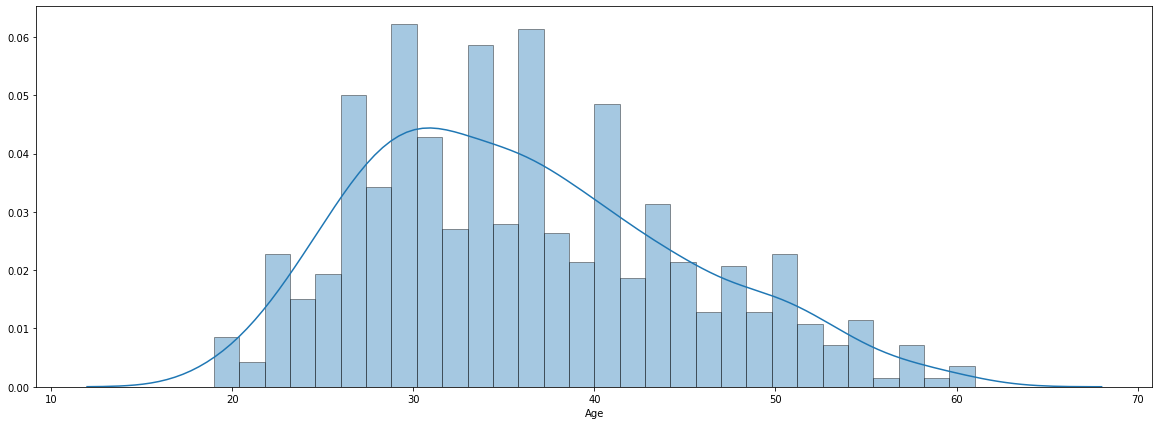

In [9]:
plt.figure(figsize=(20,7))
sns.distplot(dataframe['Age'], bins = 30, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

Here, we can see that most of the internet users are having age in the range of 26 to 42 years.

In [10]:
print('Age of the oldest person:', dataframe['Age'].max(), 'Years')
print('Age of the youngest person:', dataframe['Age'].min(), 'Years')
print('Average age in dataset:', dataframe['Age'].mean(), 'Years')

Age of the oldest person: 61 Years
Age of the youngest person: 19 Years
Average age in dataset: 36.009 Years


## income distribution in different age groups

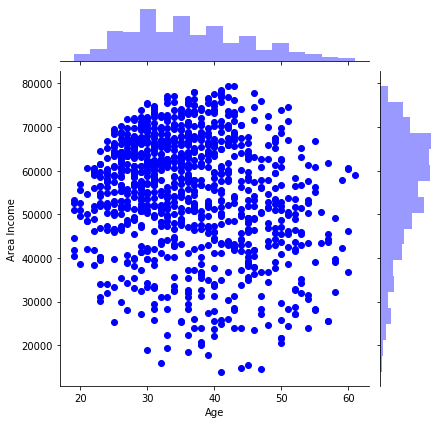

In [11]:
sns.jointplot(x='Age', y='Area Income', color= "blue", data= dataframe)

Here, we can see that mostly teenagers are higher earners with age group of 20-40 earning 50k-70k.

## Which age group is spending maximum time on the internet? 

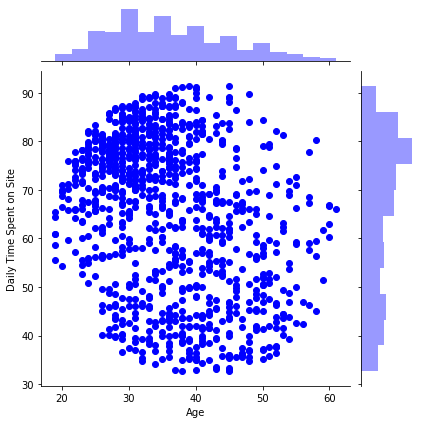

In [12]:
sns.jointplot(x='Age', y='Daily Time Spent on Site',color="blue",data= dataframe)

From the above plot its evident that the age group of 25-40 is most active on the internet.

## Which gender has clicked more on online ads?



In [13]:
dataframe.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count()

Male  Clicked on Ad
0     0                250
      1                269
1     0                250
      1                231
Name: Clicked on Ad, dtype: int64

Based on above data we can see that a greater number of females have clicked on ads compared to male.

## **Maximum number of internet users belong to which country in the given dataset?**

In [14]:
pd.crosstab(index=dataframe['Country'],columns='count').sort_values(['count'], ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
...,...
Montserrat,1
Mozambique,1
Romania,1


Based on the above data frame we can observe that maximum number of users are from France and Czech.

## Did we match our baseline that we set?

In [15]:
dataframe.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


# Relationship between different features

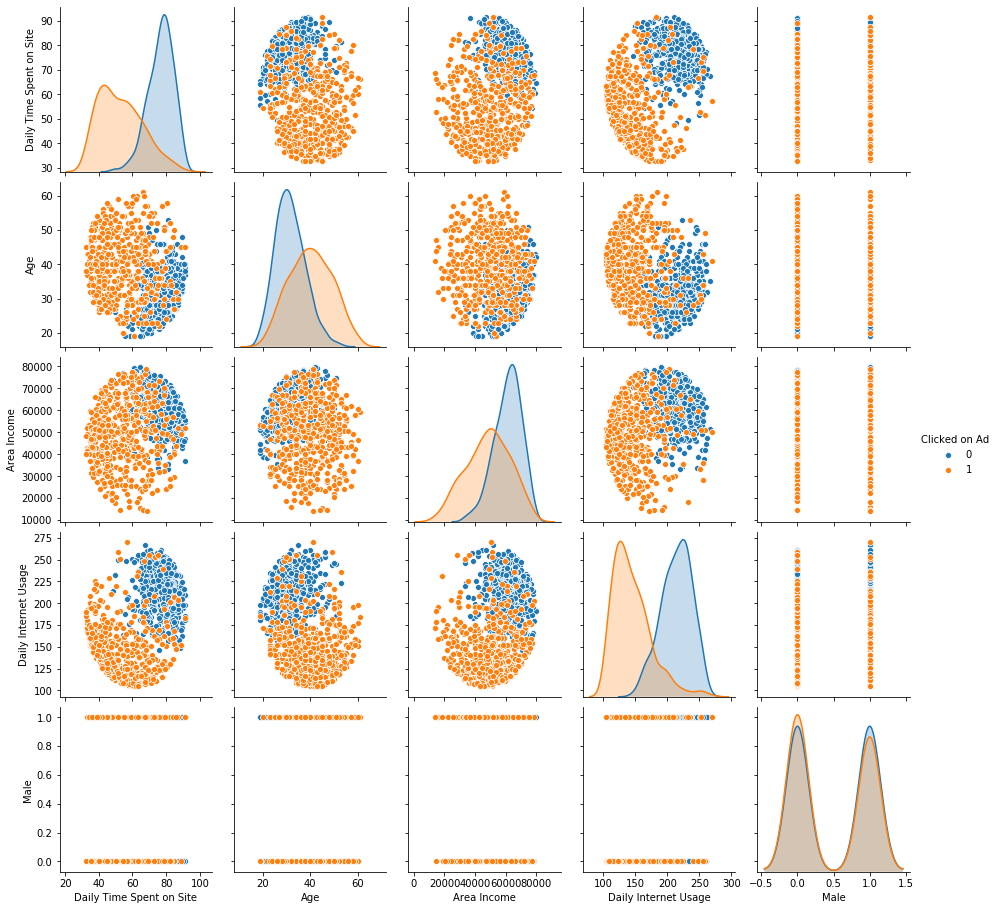

In [16]:
sns.pairplot(dataframe, hue='Clicked on Ad')

# Data Cleaning

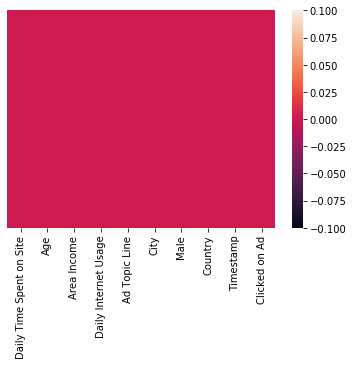

In [17]:
sns.heatmap(dataframe.isnull(), yticklabels=False)

In [18]:
datarame=pd.notnull(dataframe['Clicked on Ad'])

# Data Model Implementation

Dropping 

In [19]:
X = dataframe.drop(labels=['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis=1)

In [20]:
Y = dataframe['Clicked on Ad']

**Splitting Dataset**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 40)

**Implementing Logistic Regression Model**

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg_model = LogisticRegression()

In [25]:
log_reg_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
log_reg_pred = log_reg_model.predict(X_test)

**Implementing Decision Tree Model**

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dec_tree_model = DecisionTreeClassifier()

In [29]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
dec_tree_pred = dec_tree_model.predict(X_test)

**Finding accuracy in each model**

In [31]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [32]:
log_reg_accuracy = accuracy_score(log_reg_pred, Y_test)
print(log_reg_accuracy*100)

92.5


### Decision Tree

In [33]:
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print(dec_tree_accuracy*100);

96.5


# Conclusion

### Comparing all the above implementation models, we conclude that Decision Algorithm gives us the maximum accuracy for determining the click  probability. We believe in future there will be fewer ads, but they will be more relevant. And also these ads will cost more and will be worth it. 